In [68]:
from datetime import date, datetime
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd

In [ ]:
import twfinance

In [50]:
import bqplot as bq

In [51]:
import plotly 
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [16]:
#df_twse = pd.read_csv("dataset/finance/twse_daily.csv", parse_dates=[0])
df_twse = twfinance.twse_daily()
df_twse.head()

,Date,Open,High,Low,Close,Share,Volume,Trans,Price,UD
0,2005-01-03,6166.39,6183.15,6129.28,6143.12,4227307000,75449754940,637322,6143.12,3.43
1,2005-01-04,6117.87,6129.38,6053.18,6060.46,3233436080,58792130871,532370,6060.46,-82.66
2,2005-01-05,5999.47,6030.19,5988.37,5988.37,2865117045,52300990624,462124,5988.37,-72.09
3,2005-01-06,5988.72,6002.52,5971.58,5982.12,2395164773,45371870573,409323,5982.12,-6.25
4,2005-01-07,5990.78,6007.34,5934.83,5935.99,3012464616,57681200308,504848,5935.99,-46.13


In [80]:
df_twse['UDP'] = df_twse['UD']/df_twse['Close']*100

In [86]:
df_twse = df_twse.drop('UD%', axis=1)

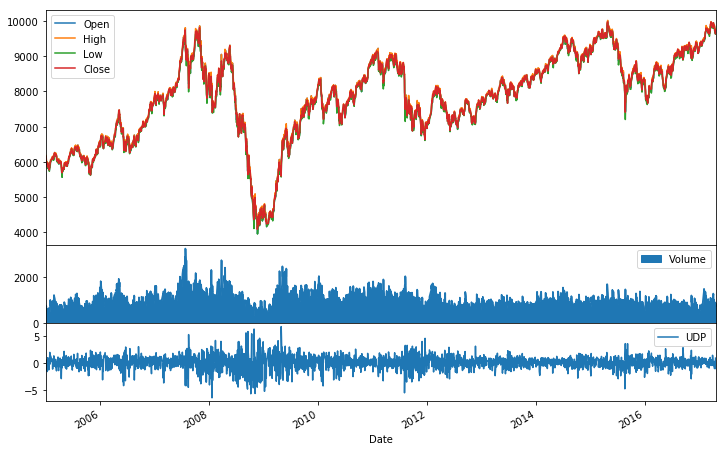

In [81]:
gs = gridspec.GridSpec(3, 1, hspace=0, height_ratios=[3,1,1])
ax1, ax2, ax3 = (plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]))
df.set_index('Date')[['Open', 'High', 'Low', 'Close']].plot(figsize=(12,8), ax=ax1)
(df.set_index('Date')[['Volume']]/100000000).plot(kind='area',ax=ax2)
df_twse.set_index('Date')[['UDP']].plot(ax=ax3)

In [82]:
df_twse[['UD', 'UDP']] = df_twse[['UD', 'UDP']].shift(-1)

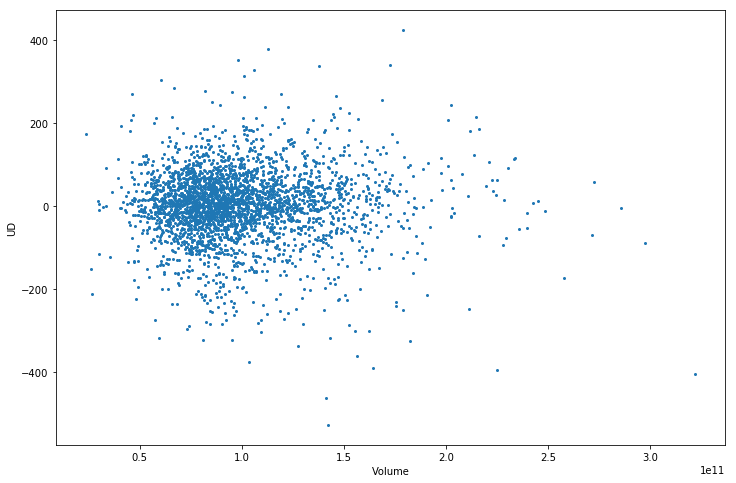

In [49]:
df_twse.plot.scatter(x='Volume', y='UD', s=4, figsize=(12,8))

In [52]:
trace1 = go.Scatter(
    x = df_twse.dropna().Volume.tolist(),
    y = df_twse.dropna().UD.tolist(),
    mode='markers',
    marker=dict(
        size='3',
        color = df_twse.dropna()['UDP'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]
plotly.offline.iplot(data, filename='Vol&UpDown')

In [53]:
sc_x = bq.LinearScale()
sc_y = bq.LinearScale()
#sc_c1.colors = ['blue', 'green', 'orange']
sc_c1 = bq.ColorScale(colors = ['green', 'blue', 'red'])
scatter = bq.Scatter(x=df_twse.dropna().Volume, 
                  y=df_twse.dropna().UD, 
                  color=df_twse.dropna()['UDP'],
                  scales={'x': sc_x, 'y': sc_y, 'color': sc_c1}, default_size=5,
                    )#stroke='black')

ax_y = bq.Axis(label='Up&Down', scale=sc_y, orientation='vertical', side='left')

ax_x = bq.Axis(label='Volume', scale=sc_x)
ax_c = bq.ColorAxis(scale=sc_c1, label='UDP', num_ticks=10, side='right')

#m_chart = dict(top=50, bottom=80, left=50, right=50)
bq.Figure(axes=[ax_x, ax_c, ax_y], marks=[scatter])#, fig_margin=m_chart)

In [54]:
para_vol_avg = 40
df_twse['Volume%s'%str(para_vol_avg)] = df_twse.Volume.rolling(window=para_vol_avg).mean()
df_twse['Vol_Volume%s'%str(para_vol_avg)] = df_twse.Volume - df_twse['Volume%s'%str(para_vol_avg)]

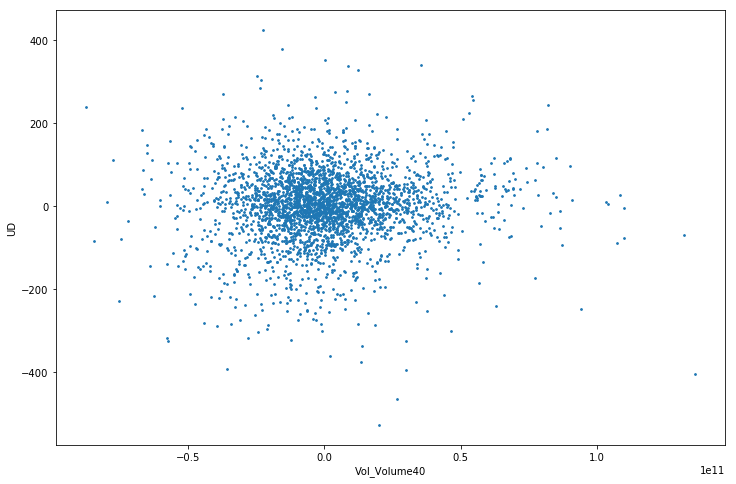

In [55]:
df_twse.dropna().plot.scatter(x='Vol_Volume%s'%str(para_vol_avg), y='UD', s=3, figsize=(12,8))

In [56]:
trace1 = go.Scatter(
    y = df_twse.dropna()['Vol_Volume%s'%str(para_vol_avg)].tolist(),
    x = df_twse.dropna().UD.tolist(),
    mode='markers',
    marker=dict(
        size='3',
        color = df_twse.dropna()['UDP'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)

data = [trace1]
plotly.offline.iplot(data, filename='Vol&UpDown')

In [58]:
sc_x = bq.LinearScale()
sc_y = bq.LinearScale()
#sc_c1.colors = ['blue', 'green', 'orange']
sc_c1 = bq.ColorScale(colors = ['blue', 'black', 'red'])

scatter = bq.Scatter(y=df_twse.dropna().UD.tolist(),
                  x=df_twse.dropna()['Vol_Volume%s'%str(para_vol_avg)].tolist(), 
                  color=df_twse.dropna()['UDP'],
                  scales={'x': sc_x, 'y': sc_y, 'color': sc_c1}, default_size=5,
                    )#stroke='black')

ax_y = bq.Axis(label='Up&Down', scale=sc_y, orientation='vertical', side='left')

ax_x = bq.Axis(label='Volume', scale=sc_x)
ax_c = bq.ColorAxis(scale=sc_c1, label='UD%', num_ticks=10, side='right')

#m_chart = dict(top=50, bottom=80, left=50, right=50)
bq.Figure(axes=[ax_x, ax_c, ax_y], marks=[scatter])#, fig_margin=m_chart)

In [59]:
df_twse.dropna().corr()

,Open,High,Low,Close,Share,Volume,Trans,Price,UD,UD%,Volume40,Vol_Volume40
Open,1.000000,0.999512,0.999129,0.998422,0.384883,0.243453,0.230111,0.998422,-0.035522,-0.033068,0.268708,0.045567
High,0.999512,1.000000,0.999131,0.999203,0.390978,0.249112,0.236053,0.999203,-0.034913,-0.032617,0.272192,0.049608
Low,0.999129,0.999131,1.000000,0.999441,0.375505,0.232754,0.218480,0.999441,-0.035140,-0.032764,0.256476,0.044021
Close,0.998422,0.999203,0.999441,1.000000,0.382225,0.239606,0.225840,1.000000,-0.035254,-0.032899,0.262304,0.047177
Share,0.384883,0.390978,0.375505,0.382225,1.000000,0.803895,0.872609,0.382225,0.009865,0.016267,0.420481,0.654390
Volume,0.243453,0.249112,0.232754,0.239606,0.803895,1.000000,0.891354,0.239606,-0.000634,0.005342,0.694111,0.629367
Trans,0.230111,0.236053,0.218480,0.225840,0.872609,0.891354,1.000000,0.225840,0.004498,0.009370,0.564849,0.619120
Price,0.998422,0.999203,0.999441,1.000000,0.382225,0.239606,0.225840,1.000000,-0.035254,-0.032899,0.262304,0.047177
UD,-0.035522,-0.034913,-0.035140,-0.035254,0.009865,-0.000634,0.004498,-0.035254,1.000000,0.981560,-0.040818,0.043189
UD%,-0.033068,-0.032617,-0.032764,-0.032899,0.016267,0.005342,0.009370,-0.032899,0.981560,1.000000,-0.039070,0.049541


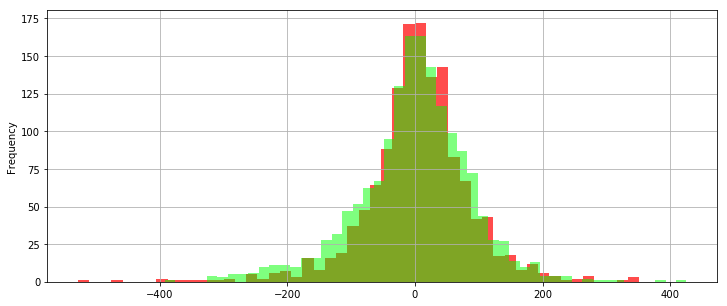

In [60]:
ax = df_twse[df_twse['Vol_Volume40']>0]['UD'].plot.hist(bins=50, grid=True, color=(1,0,0),figsize=(12,5), alpha=0.7)
df_twse[df_twse['Vol_Volume40']<0]['UD'].plot.hist(bins=50, grid=True, color=(0,1,0),figsize=(12,5), alpha=0.5, ax=ax)

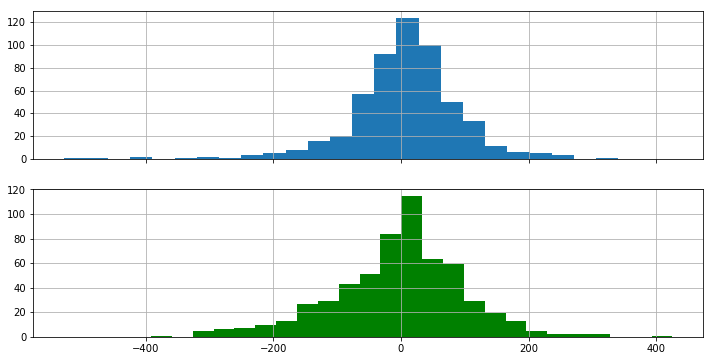

In [105]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
df_twse[df_twse['Vol_Volume40']>df_twse['Vol_Volume40'].mean() + 0.75*df_twse['Vol_Volume40'].std()]['UD'].hist(bins=25, figsize=(12,6), ax=ax1)
df_twse[df_twse['Vol_Volume40']<df_twse['Vol_Volume40'].mean() - 0.75*df_twse['Vol_Volume40'].std()]['UD'].hist(bins=25, color='green', ax=ax2)

In [39]:
df_txfr1 = pd.read_csv('dataset/finance/txfr1_daily.csv', parse_dates=[0])

In [49]:
df_txfr1[['UD', 'UDP']] = df_txfr1[['UD', 'UDP']].shift(-1)

In [52]:
df = pd.merge(df_twse, df_txfr1, on='Date', suffixes=('_s', '_f'))

In [56]:
df['FSdiv'] = df['Close_f'] - df['Close_s']

In [58]:
df.head()

,Date,Open_s,High_s,Low_s,Close_s,Share,Volume_s,Trans,Price,UD_s,...,Volume40,Vol_Volume40,Open_f,High_f,Low_f,Close_f,UD_f,UDP_f,Volume_f,FSdiv
0,2005-01-03,6166.39,6183.15,6129.28,6143.12,4227307000,75449754940,637322,6143.12,-82.66,...,NaN,NaN,6185.0,6193.0,6154,6174.0,-94.0,-1.5225,20319,30.88
1,2005-01-04,6117.87,6129.38,6053.18,6060.46,3233436080,58792130871,532370,6060.46,-72.09,...,NaN,NaN,6145.0,6152.0,6062,6080.0,-67.0,-1.1020,38182,19.54
2,2005-01-05,5999.47,6030.19,5988.37,5988.37,2865117045,52300990624,462124,5988.37,-6.25,...,NaN,NaN,6011.0,6027.0,5996,6013.0,4.0,0.0665,25857,24.63
3,2005-01-06,5988.72,6002.52,5971.58,5982.12,2395164773,45371870573,409323,5982.12,-46.13,...,NaN,NaN,6008.0,6023.0,5995,6017.0,-52.0,-0.8642,14673,34.88
4,2005-01-07,5990.78,6007.34,5934.83,5935.99,3012464616,57681200308,504848,5935.99,6.86,...,NaN,NaN,6018.0,6035.0,5951,5965.0,22.0,0.3688,37209,29.01


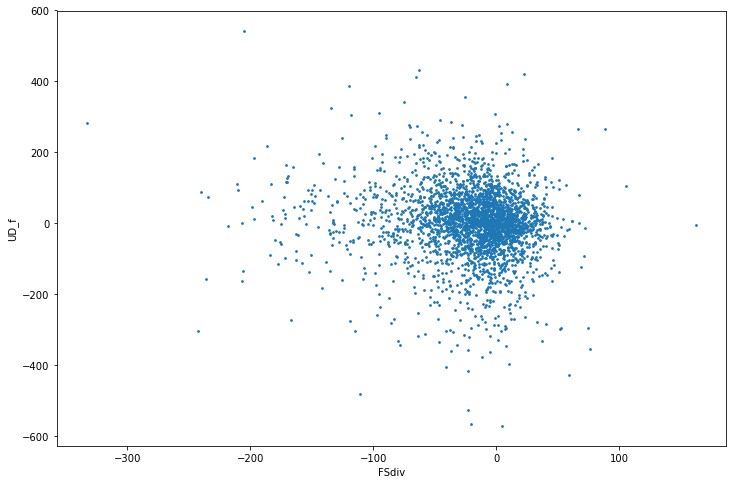

In [59]:
df.dropna().plot.scatter(x='FSdiv', y='UD_f', s=3, figsize=(12,8))

In [61]:
trace1 = go.Scatter(
    x = df.dropna().FSdiv.tolist(),
    y = df.dropna().UD_f.tolist(),
    mode='markers',
    marker=dict(
        size='3',
        color = df.dropna()['UDP_f'], #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]
plotly.offline.iplot(data, filename='FSdiv')

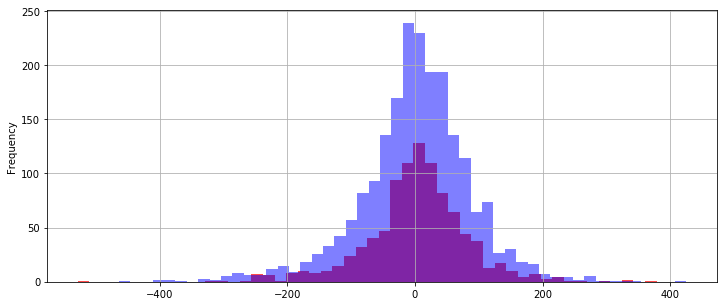

In [64]:
ax = df[df['FSdiv']>0]['UD_s'].plot.hist(bins=50, grid=True, color=(1,0,0),figsize=(12,5), alpha=0.7)
df[df['FSdiv']<0]['UD_s'].plot.hist(bins=50, grid=True, color=(0,0,1),figsize=(12,5), alpha=0.5, ax=ax)

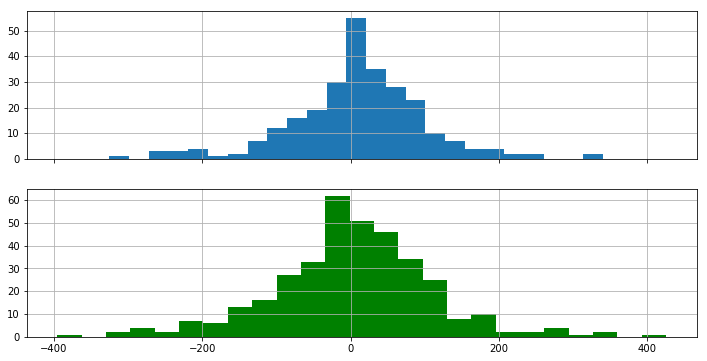

In [99]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
df[df['FSdiv']>df['FSdiv'].mean() + df['FSdiv'].std()]['UD_s'].hist(bins=25, figsize=(12,6), ax=ax1)
df[df['FSdiv']<df['FSdiv'].mean() - df['FSdiv'].std()]['UD_s'].hist(bins=25, color='green', ax=ax2)

In [108]:
df['FSdiv'].mean()

-20.304430592105273

In [137]:
df[(df['Vol_Volume%s'%str(para_vol_avg)]>0)&(df['FSdiv']<-20)]['UD_f'].sum()

8928.0

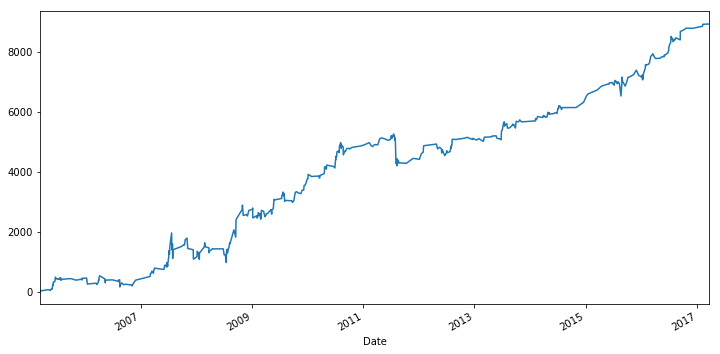

In [145]:
df[(df['Vol_Volume%s'%str(para_vol_avg)]>0)&(df['FSdiv']<-20)].set_index('Date')['UD_f'].cumsum().plot(figsize=(12,6))

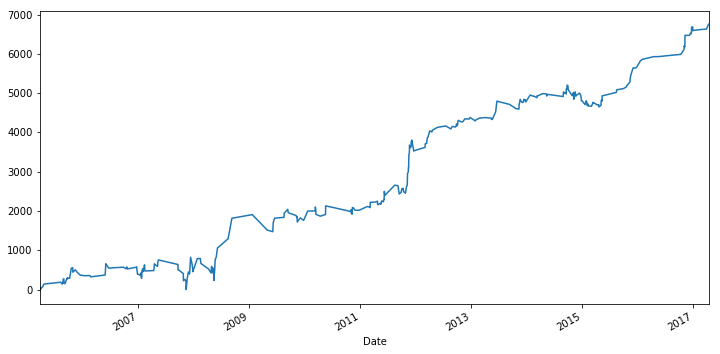

In [166]:
(df[(df['Vol_Volume%s'%str(para_vol_avg)]<0)&(df['FSdiv']>5)].set_index('Date')['UD_f']*-1).cumsum().plot(figsize=(12,6))

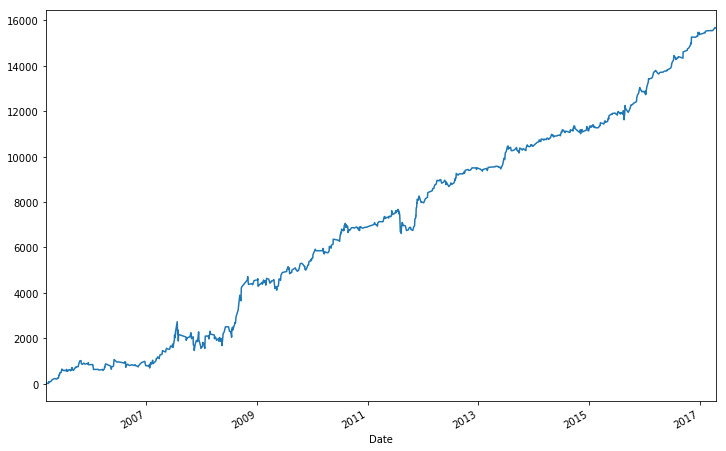

In [165]:
pd.concat([df[(df['Vol_Volume%s'%str(para_vol_avg)]>0)&(df['FSdiv']<-20)].set_index('Date')['UD_f'],
(df[(df['Vol_Volume%s'%str(para_vol_avg)]<0)&(df['FSdiv']>5)].set_index('Date')['UD_f']*-1)]).sort_index().cumsum().plot(figsize=(12,8))